In [14]:
from helper import *

In [16]:
input_task = S2L1CWCSInput('1_TRUE_COLOR', resx='50m', resy='50m', maxcc=1, instance_id="f9ffdffa-be54-4758-a111-be29f5331746")

In [17]:
time_interval = ['2019-10-20','2019-11-10']

In [18]:
workflow = LinearWorkflow(input_task)

In [19]:
hyderbad_outline = gpd.read_file("https://raw.githubusercontent.com/gok03/eo-learn-5p-support/master/hyderabad.geojson")
outline_bbox = get_bbox(hyderbad_outline)

In [20]:
result = workflow.execute({input_task: {'bbox': outline_bbox, 'time_interval': time_interval}})

In [21]:
result

WorkflowResults(
  Dependency(S2L1CWCSInput):
    EOPatch(
      data: {
        1_TRUE_COLOR: numpy.ndarray(shape=(10, 719, 977, 3), dtype=float32)
      }
      mask: {
        IS_DATA: numpy.ndarray(shape=(10, 719, 977, 1), dtype=bool)
      }
      scalar: {}
      label: {}
      vector: {}
      data_timeless: {}
      mask_timeless: {}
      scalar_timeless: {}
      label_timeless: {}
      vector_timeless: {}
      meta_info: {
        maxcc: 1
        service_type: 'wcs'
        size_x: '50m'
        size_y: '50m'
        time_difference: datetime.timedelta(-1, 86399)
        time_interval: ['2019-10-20', '2019-11-10']
      }
      bbox: BBox(((78.20033824999999, 17.26471826), (78.66075964999999, 17.58775154)), crs=EPSG:4326)
      timestamp: [datetime.datetime(2019, 10, 21, 5, 24, 5), ..., datetime.datetime(2019, 11, 10, 5, 24, 6)], length=10
    )
)

In [22]:
patch = list(result.values())[-1]

In [24]:
patch.timestamp

[datetime.datetime(2019, 10, 21, 5, 24, 5),
 datetime.datetime(2019, 10, 21, 5, 24, 7),
 datetime.datetime(2019, 10, 26, 5, 24, 3),
 datetime.datetime(2019, 10, 26, 5, 24, 4),
 datetime.datetime(2019, 10, 31, 5, 24, 5),
 datetime.datetime(2019, 10, 31, 5, 24, 7),
 datetime.datetime(2019, 11, 5, 5, 24, 2),
 datetime.datetime(2019, 11, 5, 5, 24, 4),
 datetime.datetime(2019, 11, 10, 5, 24, 4),
 datetime.datetime(2019, 11, 10, 5, 24, 6)]

In [25]:
def plot_rgb_w_water(eopatch, idx):
    ratio = np.abs(eopatch.bbox.max_x - eopatch.bbox.min_x) / np.abs(eopatch.bbox.max_y - eopatch.bbox.min_y)
    fig, ax = plt.subplots(figsize=(ratio * 10, 10))
    
    ax.imshow(eopatch.data['1_TRUE_COLOR'][idx])
    ax.axis('off')

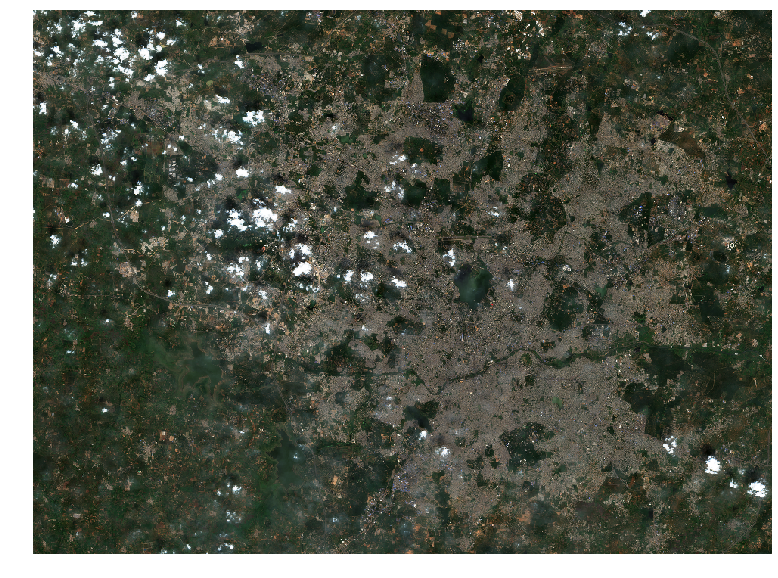

In [32]:
plot_rgb_w_water(patch,7)